In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
import statsmodels.formula.api as smf

In [4]:
affair = pd.read_csv("C:/Users/anjum/Documents/Exelir workshop/Dataset/Affairs.csv")

In [5]:
affair.head()

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,3,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,5,3,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0


In [6]:
affair.naffairs[affair.naffairs > 0] = 1


In [7]:
affair.naffairs[affair.naffairs == 0] = 0

In [8]:
affair

,Unnamed: 0,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,2,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,3,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,4,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,5,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,597,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
597,598,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
598,599,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
599,600,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [9]:
affair.isna().sum()

Unnamed: 0    0
naffairs      0
kids          0
vryunhap      0
unhap         0
avgmarr       0
hapavg        0
vryhap        0
antirel       0
notrel        0
slghtrel      0
smerel        0
vryrel        0
yrsmarr1      0
yrsmarr2      0
yrsmarr3      0
yrsmarr4      0
yrsmarr5      0
yrsmarr6      0
dtype: int64

In [10]:
affairs = affair.iloc[0:602,1:19]

In [11]:
affairs

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
3,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
4,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
597,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1
598,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0
599,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1


In [12]:
from sklearn.model_selection import train_test_split 

In [13]:
from sklearn import metrics

In [14]:
from sklearn.metrics import classification_report

In [15]:
train_data,test_data = train_test_split(affairs,test_size=0.3)

In [16]:
# Model Building

In [17]:
logit_model =smf.logit('naffairs ~ kids+vryunhap+unhap+avgmarr+hapavg+vryhap+antirel+notrel+slghtrel+smerel+vryrel+yrsmarr1+yrsmarr2+yrsmarr3+yrsmarr4+yrsmarr5+yrsmarr6',data=train_data).fit()

Optimization terminated successfully.
         Current function value: 0.488721
         Iterations 12


In [19]:
logit_model.summary2()

C:\Users\anjum\anaconda3\lib\site-packages\statsmodels\base\model.py:1354: RuntimeWarning: invalid value encountered in sqrt
  bse_ = np.sqrt(np.diag(self.cov_params()))
C:\Users\anjum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\anjum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\anjum\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                  Logit               Pseudo R-squared:    0.135     
Dependent Variable:     naffairs            AIC:                 440.5253  
Date:                   2020-09-03 11:46    BIC:                 501.1291  
No. Observations:       420                 Log-Likelihood:      -205.26   
Df Model:               14                  LL-Null:             -237.27   
Df Residuals:           405                 LLR p-value:         2.2861e-08
Converged:              1.0000              Scale:               1.0000    
No. Iterations:         12.0000                                            
---------------------------------------------------------------------------
           Coef.     Std.Err.      z    P>|z|      [0.025         0.975]   
---------------------------------------------------------------------------
Intercept -0.6305 13052399.2213 -0.0000 1.0000 -25582233.0161 25582231.7550
kids       0.3535        0.3795  0.9316 0.3516        -0.3903        1.0973
vryunhap   0.8789           nan     nan    nan            nan           nan
unhap      0.6382           nan     nan    nan            nan           nan
avgmarr   -0.2389           nan     nan    nan            nan           nan
hapavg    -0.6515           nan     nan    nan            nan           nan
vryhap    -1.2572           nan     nan    nan            nan           nan
antirel    0.7316           nan     nan    nan            nan           nan
notrel    -0.1235           nan     nan    nan            nan           nan
slghtrel   0.1548           nan     nan    nan            nan           nan
smerel    -0.8682           nan     nan    nan            nan           nan
vryrel    -0.5251           nan     nan    nan            nan           nan
yrsmarr1  -1.2310           nan     nan    nan            nan           nan
yrsmarr2  -0.2361           nan     nan    nan            nan           nan
yrsmarr3   0.2335           nan     nan    nan            nan           nan
yrsmarr4   0.1060           nan     nan    nan            nan           nan
yrsmarr5   0.1334           nan     nan    nan            nan           nan
yrsmarr6   0.3637           nan     nan    nan            nan           nan
===========================================================================

"""

In [20]:
train_pred = logit_model.predict(train_data.iloc[:,1:])

In [21]:
train_data

,naffairs,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
450,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
400,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
141,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
261,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
27,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
600,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
401,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
348,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [22]:
train_data.iloc[:,1:]

,kids,vryunhap,unhap,avgmarr,hapavg,vryhap,antirel,notrel,slghtrel,smerel,vryrel,yrsmarr1,yrsmarr2,yrsmarr3,yrsmarr4,yrsmarr5,yrsmarr6
450,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
400,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
141,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
261,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
27,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
600,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0
401,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
348,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0


In [23]:
train_pred

450    0.032886
400    0.210776
141    0.127196
261    0.192630
27     0.095579
         ...   
478    0.241233
600    0.306093
401    0.585102
348    0.133491
581    0.217871
Length: 420, dtype: float64

In [24]:
train_data["train_pred"] = np.zeros(420)

C:\Users\anjum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
train_data.loc[train_pred > 0.5,"train_pred"] = 1

C:\Users\anjum\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
# classification Report

In [26]:
classification = classification_report(train_data["train_pred"],train_data["naffairs"])

In [27]:
classification

'              precision    recall  f1-score   support\n\n         0.0       0.94      0.80      0.86       371\n         1.0       0.28      0.61      0.39        49\n\n    accuracy                           0.77       420\n   macro avg       0.61      0.70      0.62       420\nweighted avg       0.86      0.77      0.81       420\n'

In [ ]:
# confusion Matrix

In [28]:
confusion_matrix = pd.crosstab(train_data.train_pred,train_data["naffairs"])

In [29]:
confusion_matrix

naffairs,0,1
train_pred,,
0.0,295,76
1.0,19,30


In [30]:
acc = (316+13)/(316+83+8+13)

In [31]:
acc

0.7833333333333333

In [ ]:
# Roc curve and auc

In [32]:
fpr,tpr,threshold = metrics.roc_curve(train_data["naffairs"],train_pred)

Text(0, 0.5, 'True Positive rate')

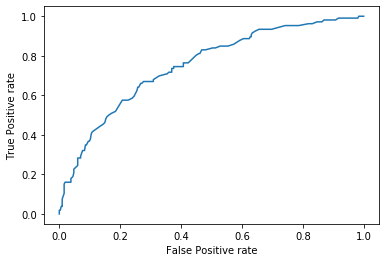

In [33]:
plt.plot(fpr,tpr);plt.xlabel("False Positive rate");plt.ylabel("True Positive rate")

In [34]:
roc_auc =metrics.auc(fpr,tpr)

In [35]:
roc_auc

0.7502854224251893

In [ ]:
# prediction on Test data

In [36]:
test_pred = logit_model.predict(test_data)

In [37]:
test_pred

93     0.159313
507    0.052714
211    0.264938
253    0.194007
189    0.381975
         ...   
339    0.091422
163    0.264795
136    0.155035
290    0.391995
524    0.155688
Length: 181, dtype: float64

In [38]:
test_data["test_pred"] = np.zeros(181)

C:\Users\anjum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [39]:
test_data.loc[test_pred > 0.5,"test_pred"] = 1

C:\Users\anjum\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [40]:
classification = classification_report(test_data["test_pred"],test_data["naffairs"])

In [41]:
classification

'              precision    recall  f1-score   support\n\n         0.0       0.87      0.80      0.83       149\n         1.0       0.32      0.44      0.37        32\n\n    accuracy                           0.73       181\n   macro avg       0.59      0.62      0.60       181\nweighted avg       0.77      0.73      0.75       181\n'

In [42]:
confusion = pd.crosstab(test_data.test_pred,test_data["naffairs"])

In [43]:
confusion

naffairs,0,1
test_pred,,
0.0,119,30
1.0,18,14


In [44]:
acc = (120+12)/(120+42+7+12)

In [45]:
acc

0.7292817679558011